In [68]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt

#Read Time Series Data
demand=pd.read_csv('demand.csv',delimiter=',',error_bad_lines=False)

In [69]:
#Read Holiday File
holiday=pd.read_csv('HOLIDAY.csv',delimiter=',',error_bad_lines=False)
holiday[:5]

,DATEDIMID,DAY_OF_THE_WEEK,HOLIDAY
0,20120101,SUNDAY,New Year's Day
1,20120102,MONDAY,New Year Day+1
2,20120103,TUESDAY,New Year Day+2
3,20120104,WEDNESDAY,None
4,20120105,THURSDAY,None


In [70]:
#Convert any date in input data to Python Date object
demand['NEWDATE']=pd.to_datetime(demand.NEWDATE.apply(str))
holiday['DATEDIMID']=pd.to_datetime(holiday.DATEDIMID.apply(str))

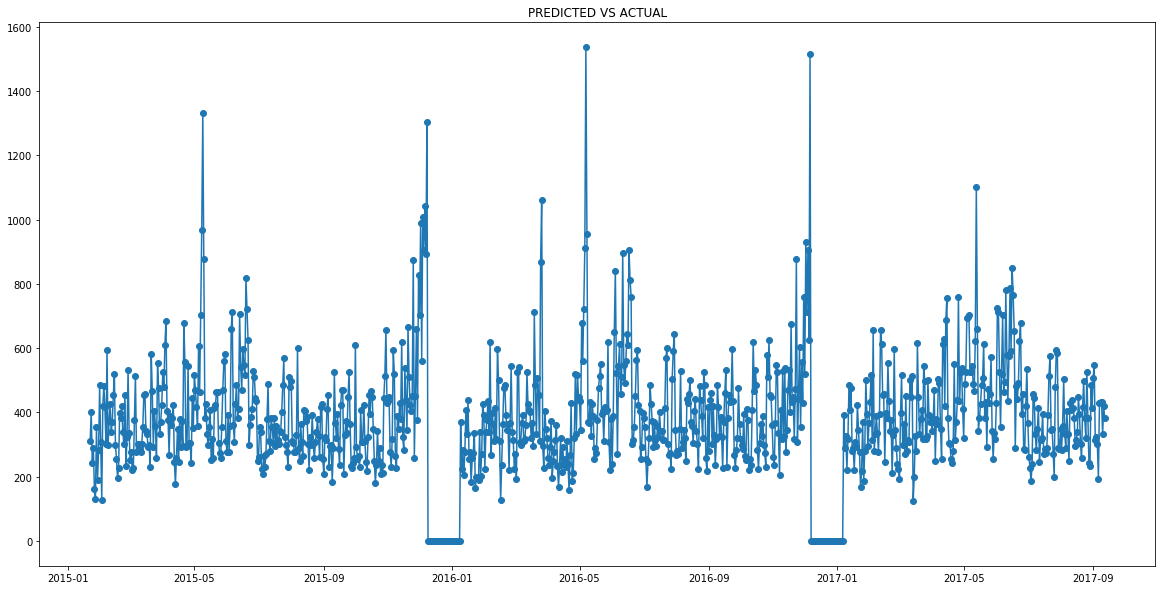

In [71]:
#Explore Time Series
plt.figure(figsize=(20,10))
plt.plot_date(demand['NEWDATE'],demand['UNITS'],linestyle='-')
plt.title("PREDICTED VS ACTUAL")
plt.show()

In [72]:
#Generate Day, Month, Year features
demand1 = demand.join(pd.DataFrame({'year' : demand.NEWDATE.dt.year, 'month' : demand.NEWDATE.dt.month, 'day' : demand.NEWDATE.dt.day}))

In [73]:
#Join with holidat dataser
featureset=demand1.merge(holiday,left_on=['NEWDATE'],right_on=['DATEDIMID'],how='left')

In [74]:
#Merged Dataset
featureset[:5]

,UNITS,NEWDATE,day,month,year,DATEDIMID,DAY_OF_THE_WEEK,HOLIDAY
0,312.511011,2015-01-22,22,1,2015,2015-01-22,THURSDAY,None
1,400.400756,2015-01-23,23,1,2015,2015-01-23,FRIDAY,None
2,243.048040,2015-01-24,24,1,2015,2015-01-24,SATURDAY,None
3,290.361297,2015-01-25,25,1,2015,2015-01-25,SUNDAY,None
4,163.152387,2015-01-26,26,1,2015,2015-01-26,MONDAY,None


In [75]:
#Replace nulls with 0
featureset=featureset.fillna(0)

In [76]:
#Holiday Feature Engineering - Encode Holiday Features (From categorical to numeric indexes)
featureset['HOLIDAY'] = featureset.HOLIDAY.map( lambda x: 'None' if (x == '0' or x == 0)else x)

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

enc.fit(featureset['DAY_OF_THE_WEEK'])
featureset['WEEKDAY'] = enc.transform(featureset['DAY_OF_THE_WEEK'])

enc.fit(featureset['HOLIDAY'])
featureset['HOLIDAY'] = enc.transform(featureset['HOLIDAY'])

featureset=featureset.drop(['DATEDIMID', 'DAY_OF_THE_WEEK'], axis=1)
featureset[:5]

#Our Final dataset

,UNITS,NEWDATE,day,month,year,HOLIDAY,WEEKDAY
0,312.511011,2015-01-22,22,1,2015,50,4
1,400.400756,2015-01-23,23,1,2015,50,0
2,243.048040,2015-01-24,24,1,2015,50,2
3,290.361297,2015-01-25,25,1,2015,50,3
4,163.152387,2015-01-26,26,1,2015,50,1


In [77]:
#LSTM for Regression Using the Window Method. Please notice the window dataset below
for obs in range(1,3):
    featureset["T_" + str(obs)] = featureset.UNITS.shift(obs)
featureset=featureset.fillna(0)

In [78]:
featureset[:50]

,UNITS,NEWDATE,day,month,year,HOLIDAY,WEEKDAY,T_1,T_2
0,312.511011,2015-01-22,22,1,2015,50,4,0.000000,0.000000
1,400.400756,2015-01-23,23,1,2015,50,0,312.511011,0.000000
2,243.048040,2015-01-24,24,1,2015,50,2,400.400756,312.511011
3,290.361297,2015-01-25,25,1,2015,50,3,243.048040,400.400756
4,163.152387,2015-01-26,26,1,2015,50,1,290.361297,243.048040
5,131.797368,2015-01-27,27,1,2015,50,5,163.152387,290.361297
6,353.996536,2015-01-28,28,1,2015,50,6,131.797368,163.152387
7,190.255878,2015-01-29,29,1,2015,50,4,353.996536,131.797368
8,282.798887,2015-01-30,30,1,2015,50,0,190.255878,353.996536
9,483.956735,2015-01-31,31,1,2015,50,2,282.798887,190.255878


In [79]:
m,n=featureset.shape
m,n

(964, 9)

In [80]:
#Select an arbitrary date range for forecasting
trainset=featureset.loc[featureset['NEWDATE']<='2017-04-01']
valset=featureset.loc[(featureset['NEWDATE']>='2017-04-01') & (featureset['NEWDATE']<='2017-04-30')]
testset=featureset.loc[featureset['NEWDATE']>='2017-05-01']

trainsetprescale=trainset.drop(columns=['NEWDATE','day','month','year','HOLIDAY','WEEKDAY'])
valsetprescale=valset.drop(columns=['NEWDATE','day','month','year','HOLIDAY','WEEKDAY'])
testsetprescale=testset.drop(columns=['NEWDATE','day','month','year','HOLIDAY','WEEKDAY'])

In [81]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()

Xtrain_scaled = scaler.fit_transform(trainsetprescale.drop(columns=['UNITS']))
Ytrain_scaled = scaler.fit_transform(trainsetprescale[['UNITS']])

Xtest_scaled = scaler.fit_transform(testsetprescale.drop(columns=['UNITS']))
Ytest_scaled = scaler.fit_transform(testsetprescale[['UNITS']])

Xval_scaled = scaler.fit_transform(valsetprescale.drop(columns=['UNITS']))
Yval_scaled = scaler.fit_transform(valsetprescale[['UNITS']])

In [82]:
#LSTM expects a 3D dataset as inout vector. 
#Input_X = X.reshape(a,b,c): 'a' training instances contains b rows each, each row containing c features
#In our case: 964 training instances containing 1 row each and each row has 34 features.
train_lstm = Xtrain_scaled.reshape((Xtrain_scaled.shape[0], Xtrain_scaled.shape[1], 1))
test_lstm = Xtest_scaled.reshape((Xtest_scaled.shape[0], Xtest_scaled.shape[1], 1))
val_lstm = Xval_scaled.reshape((Xval_scaled.shape[0], Xval_scaled.shape[1], 1))
train_lstm

array([[[-1.89656401],
        [-1.88982421]],

       [[-0.26673054],
        [-1.88982421]],

       [[ 0.19163938],
        [-0.26362318]],

       ...,

       [[ 0.14082028],
        [ 0.71200577]],

       [[ 0.03562709],
        [ 0.14301932]],

       [[ 0.11824116],
        [ 0.03806058]]])

In [83]:
Xtrain_scaled.shape
train_lstm.shape

(800, 2, 1)

#LSTM with single layer window method
model_k1 = Sequential()
model_k1.add(LSTM(1, input_shape=(1,34)))
model_k1.add(Dense(1))
model_k1.compile(loss='mean_squared_error', optimizer='adam')

In [84]:
#LSTM with multiple layers Window method
model_k2 = Sequential()
model_k2.add(LSTM(30,return_sequences=True, input_shape=(1,369)))
model_k2.add(LSTM(30))
model_k2.add(Dense(1))

model_k2.compile(loss='mean_squared_error', optimizer='adam')

In [93]:
#LSTM with multiple layers Time Step method

model_k3 = Sequential()
model_k3.add(LSTM(30,return_sequences=True, input_shape=(2,1)))
model_k3.add(LSTM(30))
model_k3.add(Dense(1))

model_k3.compile(loss='mean_squared_error', optimizer='adam')

In [89]:
Xtrain_scaled

array([[-1.89656401, -1.88982421],
       [-0.26673054, -1.88982421],
       [ 0.19163938, -0.26362318],
       ...,
       [ 0.14082028,  0.71200577],
       [ 0.03562709,  0.14301932],
       [ 0.11824116,  0.03806058]])

In [95]:
history = model_k3.fit(train_lstm, Ytrain_scaled, validation_data=(val_lstm, Yval_scaled),
epochs=100, batch_size=4, verbose=2)

Train on 800 samples, validate on 30 samples
Epoch 1/100
 - 1s - loss: 0.5839 - val_loss: 1.0514
Epoch 2/100
 - 1s - loss: 0.5883 - val_loss: 1.0474
Epoch 3/100
 - 1s - loss: 0.5856 - val_loss: 0.9889
Epoch 4/100
 - 1s - loss: 0.5917 - val_loss: 0.9816
Epoch 5/100
 - 1s - loss: 0.5872 - val_loss: 0.9988
Epoch 6/100
 - 1s - loss: 0.5838 - val_loss: 0.9991
Epoch 7/100
 - 1s - loss: 0.5777 - val_loss: 1.0293
Epoch 8/100
 - 1s - loss: 0.5785 - val_loss: 1.0527
Epoch 9/100
 - 1s - loss: 0.5775 - val_loss: 1.0043
Epoch 10/100
 - 1s - loss: 0.5743 - val_loss: 1.0097
Epoch 11/100
 - 1s - loss: 0.5722 - val_loss: 1.0218
Epoch 12/100
 - 1s - loss: 0.5695 - val_loss: 0.9595
Epoch 13/100
 - 1s - loss: 0.5676 - val_loss: 1.0085
Epoch 14/100
 - 1s - loss: 0.5701 - val_loss: 1.0162
Epoch 15/100
 - 1s - loss: 0.5671 - val_loss: 0.9862
Epoch 16/100
 - 1s - loss: 0.5652 - val_loss: 1.0119
Epoch 17/100
 - 1s - loss: 0.5640 - val_loss: 1.0079
Epoch 18/100
 - 1s - loss: 0.5613 - val_loss: 1.0392
Epoch 19/1

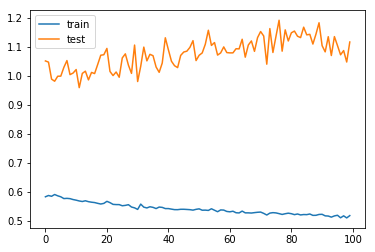

In [96]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [97]:
testPredict = model_k3.predict(test_lstm)
testPredict=scaler.inverse_transform([testPredict])
Ytest=scaler.inverse_transform(Ytest_scaled)


testset['Predicted']= testPredict[0]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
testset[:4]

In [98]:
#OVERALL RMSE
from math import sqrt
from sklearn.metrics import mean_squared_error
RMSE = (sqrt(mean_squared_error(testset['UNITS'],
                                  testset['Predicted'])))
RMSE

137.61279218275368

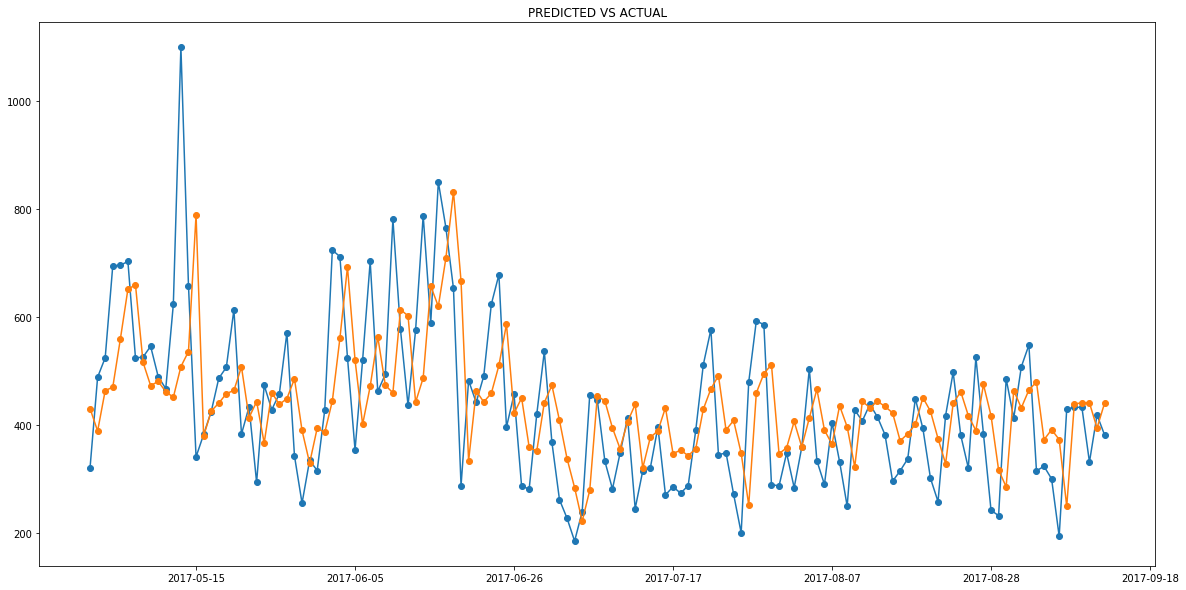

In [99]:
#Plot random forest predictions

plt.figure(figsize=(20,10))
plt.plot_date(testset['NEWDATE'],testset['UNITS'],linestyle='-')
plt.plot_date(testset['NEWDATE'],testset['Predicted'],linestyle='-')
plt.title("PREDICTED VS ACTUAL")
plt.show()
    